In [131]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [102]:
data_df = pd.read_csv('./Data/processed_selected_feature.csv')

In [103]:
# 特征与标签提取
def get_feature_label(data_df):
    features = []
    labels = []
    key_name = []
    for key in data_df.keys():
        if key != 'profit_money' and key != 'name' and key !='profit':
            key_name.append(key)
    for i in range(len(data_df['maker'])):
        feature = []
        for key in data_df.keys():
            if key == 'profit':
                labels.append(data_df[key][i])
            elif key != 'name' and key != 'profit_money':
                feature.append(data_df[key][i])
        features.append(feature)
    return features,labels,key_name

In [104]:
# 特征提取
profit_feature, profit_label, profit_key_name = get_feature_label(data_df)

In [105]:
# 特征预处理
scaler = StandardScaler()
profit_feature_normalized = scaler.fit_transform(profit_feature)

In [106]:
# 划分训练集和测试集
X = np.array(profit_feature_normalized)
y = np.array(profit_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 线性回归
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# 决策树回归
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train.ravel())
svr_predictions = svr_model.predict(X_test)

# 随机森林回归
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())
rf_predictions = rf_model.predict(X_test)

# 神经网络回归
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000)
nn_model.fit(X_train, y_train.ravel())
nn_predictions = nn_model.predict(X_test)

In [122]:
#Ridge 回归模型
ridge_model = Ridge()
param_grid = {'alpha': [0.1,1, 10, 100]}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring=scorer, cv=kf)
grid_search.fit(X_train, y_train)

rg_best_params = grid_search.best_params_
print(f'Best Parameters: {rg_best_params}')
rg_best_model = grid_search.best_estimator_
y_pred = rg_best_model.predict(X_test)

rg_mse = mean_squared_error(y_test, y_pred)
rg_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {rg_mse}')
print(f'R2: {rg_r2}')

Best Parameters: {'alpha': 10}
Mean Squared Error: 0.0528789146700495
R2: 0.5821133946557012


In [123]:
#lasso
lasso_model = Lasso()
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, scoring=scorer, cv=kf)
grid_search_lasso.fit(X_train, y_train)
lasso_best_params = grid_search.best_params_
print(f'Best Parameters: {lasso_best_params}')
lasso_best_model = grid_search_lasso.best_estimator_

y_pred = lasso_best_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {lasso_mse}')
print(f'R2: {lasso_r2}')

Best Parameters: {'alpha': 10}
Mean Squared Error: 0.052804364405122296
R2: 0.5827025436072699


In [124]:
#Elastic Net
elastic_net_model = ElasticNet()
param_grid_elastic_net = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic_net, scoring=scorer, cv=kf)
grid_search_elastic_net.fit(X_train, y_train)

elastic_net_best_model = grid_search_elastic_net.best_estimator_
y_pred = elastic_net_best_model.predict(X_test)

elastic_net_mse = mean_squared_error(y_test, y_pred)
elastic_net_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {elastic_net_mse}')
print(f'R2: {elastic_net_r2}')

Mean Squared Error: 0.05284420914695272
R2: 0.5823876622597947


In [125]:
# 线性回归模型
linear_model = LinearRegression()

param_grid = {}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_linear = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring=scorer, cv=kf)
grid_search_linear.fit(X_train, y_train)

# 获取最优模型
linear_best_model = grid_search_linear.best_estimator_

# 在测试集上进行预测
y_pred= linear_best_model.predict(X_test)

# 评估模型性能
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {linear_mse}')
print(f'R2: {linear_r2}')

Mean Squared Error: 0.052844247486661666
R2: 0.582387359272282


In [126]:
# 随机森林
rf_model = RandomForestRegressor()

param_grid_rf = {'n_estimators': [10, 20, 50],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring=scorer, cv=kf)
grid_search_rf.fit(X_train, y_train)

rf_best_model = grid_search_rf.best_estimator_
y_pred = rf_best_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f'R2: {rf_r2}')

Random Forest Mean Squared Error: 0.03891135594913879
R2: 0.6924949283019376


In [127]:
# 决策树回归模型
dt_model = DecisionTreeRegressor()

param_grid_dt = {'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}


grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring=scorer, cv=kf)
grid_search_dt.fit(X_train, y_train)


dt_best_model = grid_search_dt.best_estimator_
y_pred = dt_best_model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {dt_mse}')
print(f'R2: {dt_r2}')

Mean Squared Error: 0.04633253713752709
R2: 0.6338475026917241


In [129]:
# 神经网络回归模型
mlp_model = MLPRegressor()

param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                  'alpha': [0.0001, 0.001, 0.01],
                  'learning_rate_init': [0.001, 0.01, 0.1]}
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, scoring=scorer, cv=kf)

grid_search_mlp.fit(X_train, y_train)

# 获取最优模型
mlp_best_model = grid_search_mlp.best_estimator_

# 在测试集上进行预测
y_pred = mlp_best_model.predict(X_test)

# 评估模型性能
mlp_mse = mean_squared_error(y_test, y_pred)
mlp_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mlp_mse}')
print(f'R2: {mlp_r2}')

MLPRegressor Mean Squared Error: 0.04123229692964898
R2: 0.6741532101785281


In [132]:
# 梯度提升树
gb_model = GradientBoostingRegressor()

# 定义参数网格
param_grid_gb = {'n_estimators': [10, 20, 50],
                 'learning_rate': [0.001, 0.01, 0.1],
                 'max_depth': [3, 5, 7],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring=scorer, cv=kf)
grid_search_gb.fit(X_train, y_train)

# 获取最优模型
gb_best_model = grid_search_gb.best_estimator_

# 在测试集上进行预测
y_pred = gb_best_model.predict(X_test)

# 评估模型性能
gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {gb_mse}')
print(f'R2: {gb_r2}')

MLPRegressor Mean Squared Error: 0.03764633658697473
R2: 0.7024920065371489


In [137]:
np.sqrt(rf_mse)

0.19725961560628366

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


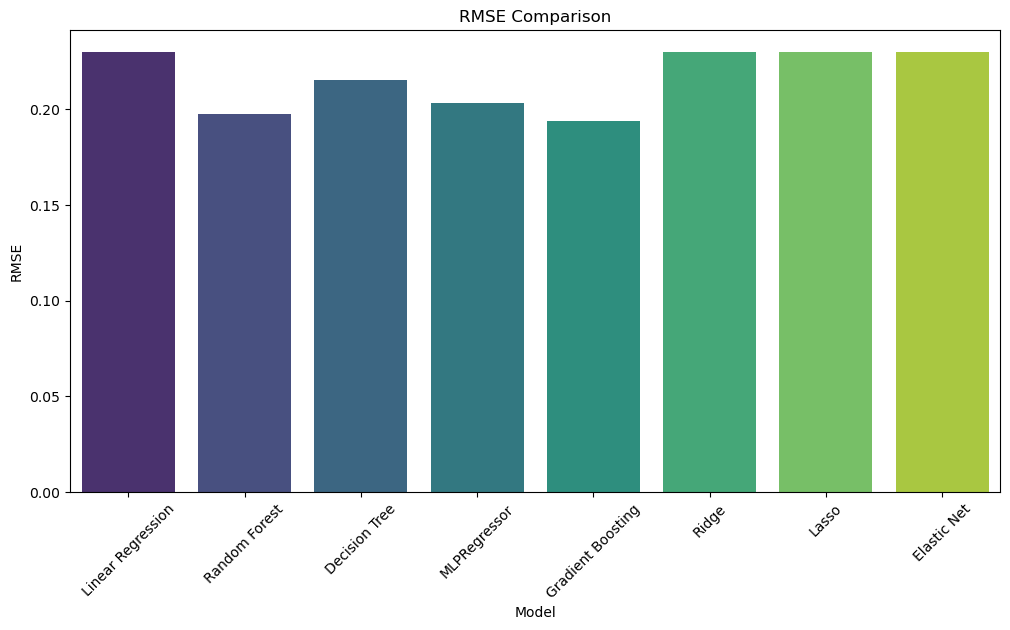

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


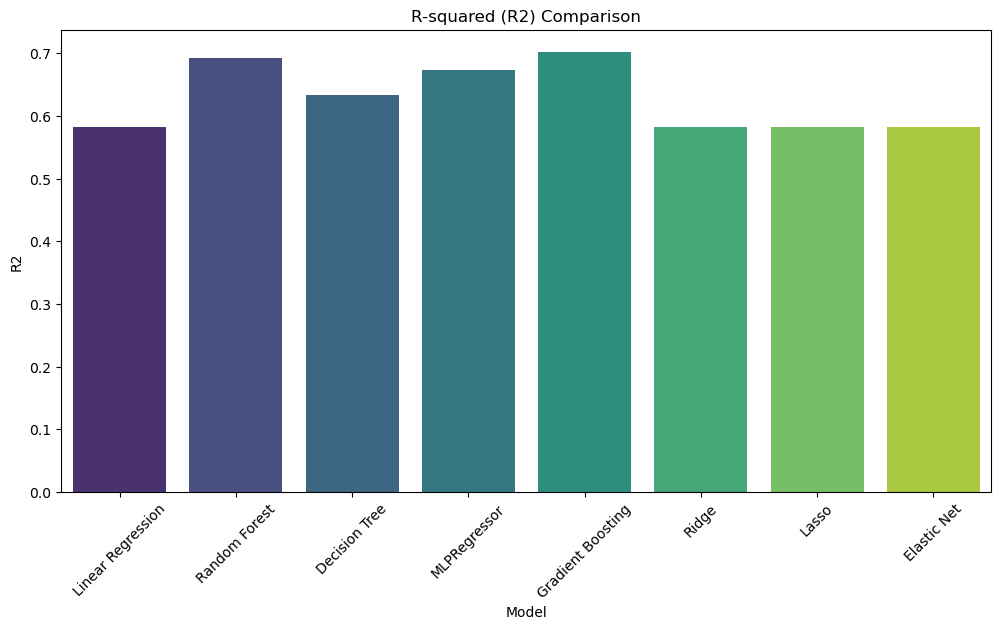

In [135]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'MLPRegressor', 'Gradient Boosting', 
          'Ridge','Lasso', 'Elastic Net']

rmse_values = [np.sqrt(linear_mse), np.sqrt(rf_mse), np.sqrt(dt_mse), np.sqrt(mlp_mse), np.sqrt(gb_mse), np.sqrt(rg_mse), np.sqrt(lasso_mse), np.sqrt(elastic_net_mse)]
r2_values = [linear_r2, rf_r2, dt_r2, mlp_r2, gb_r2, rg_r2, lasso_r2, elastic_net_r2]

df = pd.DataFrame({'Model': models, 'RMSE': rmse_values, 'R2': r2_values})

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=df, palette='viridis')
plt.title('R-squared (R2) Comparison')
plt.xticks(rotation=45)
plt.show()


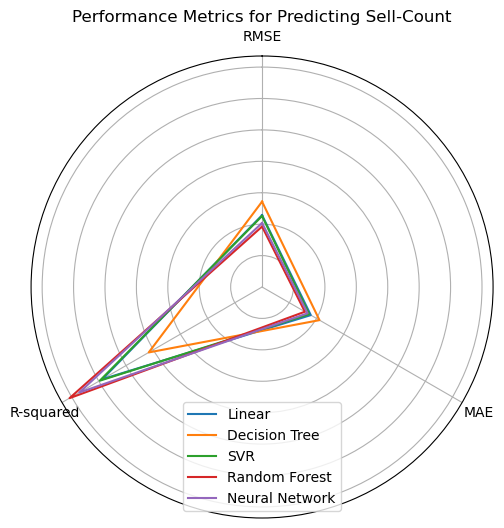

In [92]:
# 雷达图
models = ['Linear', 'Decision Tree', 
          'SVR','Random Forest','Neural Network']
predictions = [linear_predictions, tree_predictions, svr_predictions, rf_predictions, nn_predictions]
metrics = ['RMSE', 'MAE', 'R-squared']

data = []
for i in range(len(predictions)):
    y_true = y_test
    y_pred = predictions[i]
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    data.append([models[i], rmse, mae, r2])

df = pd.DataFrame(data, columns=['Model', 'RMSE', 'MAE', 'R-squared'])
categories = list(df.columns[1:])
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

for model in models:
    values = df[df['Model'] == model].iloc[0, 1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model)

#ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend(loc='lower center')
plt.title('Performance Metrics for Predicting Sell-Count')
plt.show()

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

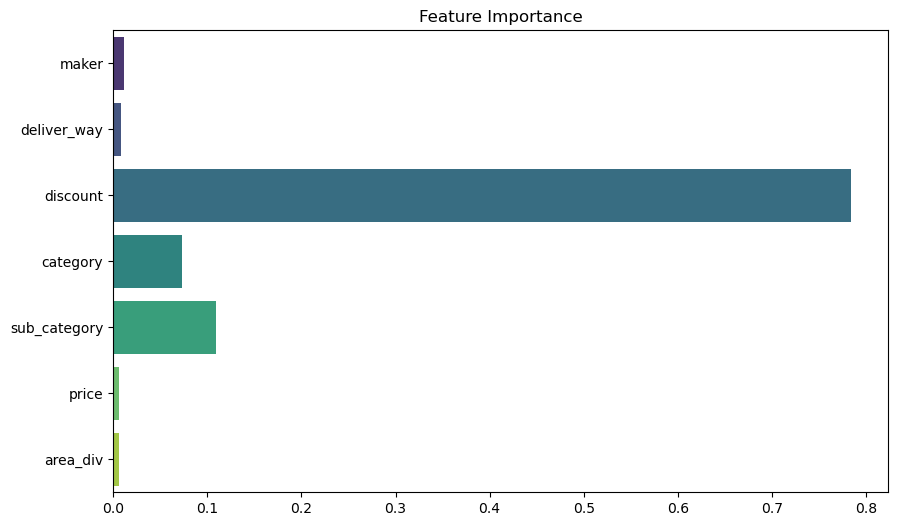

In [142]:
importance_df = {'feature':profit_key_name, 'importance':gb_best_model.feature_importances_}
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df, orient='h', palette='viridis')
plt.title('Feature Importance')
plt.show()

In [85]:
df # selected

,Model,RMSE,MAE,R-squared
0,Linear,0.231162,0.177923,0.577714
1,Decision Tree,0.265939,0.204032,0.441093
2,SVR,0.211872,0.168946,0.645249
3,Random Forest,0.198336,0.161432,0.689131
4,Neural Network,0.212796,0.172249,0.642148


In [93]:
df #raw

,Model,RMSE,MAE,R-squared
0,Linear,0.228528,0.178988,0.587281
1,Decision Tree,0.271716,0.210991,0.416547
2,SVR,0.225967,0.172971,0.596479
3,Random Forest,0.192306,0.157343,0.707747
4,Neural Network,0.203706,0.167368,0.672068
